In [2]:
#importing libraries and reading the data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('C:/Users/prash/Desktop/python materials/python_data_projects/project_IPL_analysis/delivery.csv')

In [3]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


Best batsman - most runs

In [4]:
most_runs=df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

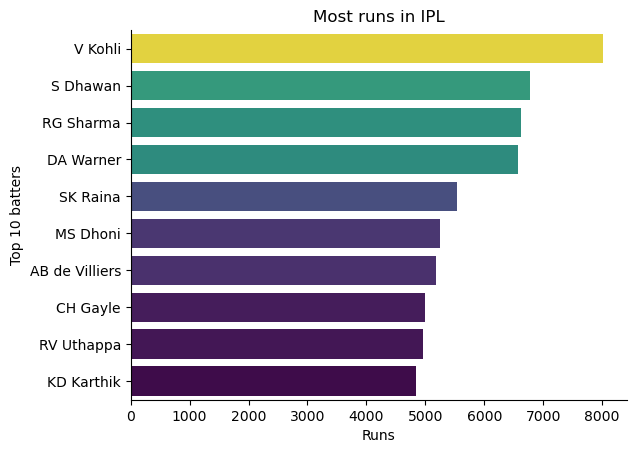

In [5]:
sns.barplot(x=most_runs.values,y=most_runs.index,hue=most_runs.values,palette='viridis')
plt.xlabel('Runs')
plt.ylabel('Top 10 batters')
plt.legend().remove()
plt.title('Most runs in IPL')
sns.despine()

Best batsman- best average

- Average is [total runs / dismissals]
- Condition: minimum total runs: 2500

In [6]:
dismissal_counts=df['player_dismissed'].value_counts()
dismissal_counts=dismissal_counts.to_frame()
dismissal_counts.reset_index(inplace=True)
dismissal_counts

,player_dismissed,count
0,RG Sharma,223
1,V Kohli,207
2,S Dhawan,193
3,KD Karthik,184
4,RV Uthappa,180
...,...,...
624,Vivrant Sharma,1
625,A Nel,1
626,VS Yeligati,1
627,H Das,1


In [7]:
most_runs_criteria= df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False)
most_runs_criteria=most_runs_criteria[most_runs_criteria>2500]
most_runs_criteria=most_runs_criteria.to_frame()
most_runs_criteria.reset_index(inplace=True)
most_runs_criteria

,batter,batsman_runs
0,V Kohli,8014
1,S Dhawan,6769
2,RG Sharma,6630
3,DA Warner,6567
4,SK Raina,5536
5,MS Dhoni,5243
6,AB de Villiers,5181
7,CH Gayle,4997
8,RV Uthappa,4954
9,KD Karthik,4843


In [8]:
most_runs_criteria=most_runs_criteria.merge(dismissal_counts,left_on='batter',right_on='player_dismissed',how='left')
most_runs_criteria.drop(columns='player_dismissed',axis=1,inplace=True)

In [9]:
most_runs_criteria

,batter,batsman_runs,count
0,V Kohli,8014,207
1,S Dhawan,6769,193
2,RG Sharma,6630,223
3,DA Warner,6567,164
4,SK Raina,5536,171
5,MS Dhoni,5243,134
6,AB de Villiers,5181,130
7,CH Gayle,4997,126
8,RV Uthappa,4954,180
9,KD Karthik,4843,184


In [10]:
most_runs_criteria['average']=most_runs_criteria['batsman_runs']/most_runs_criteria['count']
top10_avg=most_runs_criteria.sort_values(by='average',ascending=False).head(10)

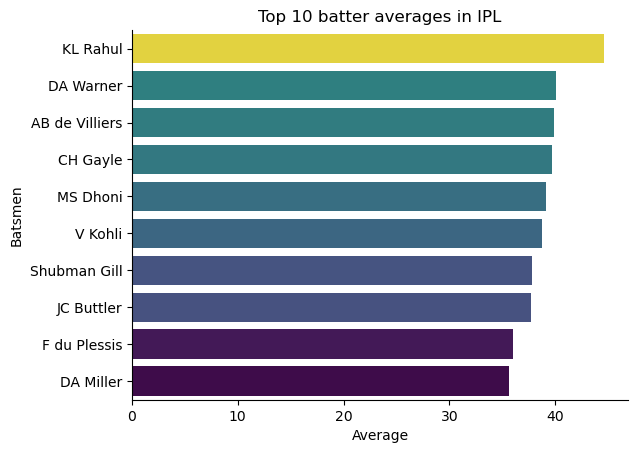

In [11]:
sns.barplot(data=top10_avg,x='average',y='batter',hue='average',palette='viridis')
plt.legend().remove()
plt.xlabel('Average')
plt.ylabel('Batsmen')
plt.title('Top 10 batter averages in IPL')
sns.despine()
plt.show()

Best batsman - strike rate

- Strike rate = (runs/balls played)*100
- consider atleast 2500 runs scored

In [12]:
strike = df.groupby('batter')[['batsman_runs','ball']].agg({'batsman_runs':'sum','ball':'count'}).sort_values(by='batsman_runs',ascending=False)    
strike['strike_rate']=(strike['batsman_runs']/strike['ball'])*100
plot_strike=strike[strike['batsman_runs']>2500].sort_values(by='strike_rate',ascending=False).head(10)

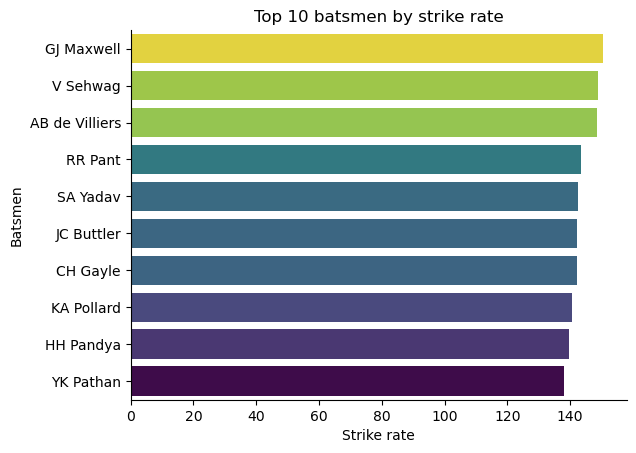

In [13]:
sns.barplot(data=plot_strike,x='strike_rate',y=plot_strike.index,hue='strike_rate',palette='viridis')
plt.xlabel('Strike rate')   
plt.ylabel('Batsmen')   
plt.title('Top 10 batsmen by strike rate')
plt.legend().remove()
sns.despine()
plt.show()


Best Batsman: Ideal IPL Batsman

Conditions:
- Average + strike rate >= 150
- Total career runs >= 2500

In [14]:
runs=df.groupby('batter')[['batsman_runs']].agg({'batsman_runs':'sum'}).sort_values(by='batsman_runs',ascending=False)
runs=runs[runs['batsman_runs']>=2500]
runs.reset_index(inplace=True)
runs

,batter,batsman_runs
0,V Kohli,8014
1,S Dhawan,6769
2,RG Sharma,6630
3,DA Warner,6567
4,SK Raina,5536
5,MS Dhoni,5243
6,AB de Villiers,5181
7,CH Gayle,4997
8,RV Uthappa,4954
9,KD Karthik,4843


In [15]:
outs=df['player_dismissed'].value_counts().reset_index()
outs

,player_dismissed,count
0,RG Sharma,223
1,V Kohli,207
2,S Dhawan,193
3,KD Karthik,184
4,RV Uthappa,180
...,...,...
624,Vivrant Sharma,1
625,A Nel,1
626,VS Yeligati,1
627,H Das,1


In [16]:
runs=runs.merge(outs,left_on='batter',right_on='player_dismissed',how='left')
runs

,batter,batsman_runs,player_dismissed,count
0,V Kohli,8014,V Kohli,207
1,S Dhawan,6769,S Dhawan,193
2,RG Sharma,6630,RG Sharma,223
3,DA Warner,6567,DA Warner,164
4,SK Raina,5536,SK Raina,171
5,MS Dhoni,5243,MS Dhoni,134
6,AB de Villiers,5181,AB de Villiers,130
7,CH Gayle,4997,CH Gayle,126
8,RV Uthappa,4954,RV Uthappa,180
9,KD Karthik,4843,KD Karthik,184


In [17]:
runs.drop(columns='player_dismissed',axis=1,inplace=True)

In [18]:
runs['average']=runs['batsman_runs']/runs['count']
runs

,batter,batsman_runs,count,average
0,V Kohli,8014,207,38.714976
1,S Dhawan,6769,193,35.072539
2,RG Sharma,6630,223,29.730942
3,DA Warner,6567,164,40.042683
4,SK Raina,5536,171,32.374269
5,MS Dhoni,5243,134,39.126866
6,AB de Villiers,5181,130,39.853846
7,CH Gayle,4997,126,39.658730
8,RV Uthappa,4954,180,27.522222
9,KD Karthik,4843,184,26.320652


In [19]:
balls_faced=df.groupby('batter')['ball'].count().reset_index()
balls_faced

,batter,ball
0,A Ashish Reddy,196
1,A Badoni,505
2,A Chandila,7
3,A Chopra,75
4,A Choudhary,20
...,...,...
668,Yashpal Singh,67
669,Younis Khan,7
670,Yudhvir Singh,16
671,Yuvraj Singh,2207


In [20]:
runs=runs.merge(balls_faced,left_on='batter',right_on='batter',how='left')
runs

,batter,batsman_runs,count,average,ball
0,V Kohli,8014,207,38.714976,6236
1,S Dhawan,6769,193,35.072539,5483
2,RG Sharma,6630,223,29.730942,5183
3,DA Warner,6567,164,40.042683,4849
4,SK Raina,5536,171,32.374269,4177
5,MS Dhoni,5243,134,39.126866,3947
6,AB de Villiers,5181,130,39.853846,3487
7,CH Gayle,4997,126,39.658730,3516
8,RV Uthappa,4954,180,27.522222,3927
9,KD Karthik,4843,184,26.320652,3687


In [21]:
runs['strike_rate']=(runs['batsman_runs']/runs['ball'])*100
runs['rating']=runs['average']+runs['strike_rate']
runs=runs.sort_values(by='rating',ascending=False).head(10)
runs

,batter,batsman_runs,count,average,ball,strike_rate,rating
6,AB de Villiers,5181,130,39.853846,3487,148.580442,188.434288
7,CH Gayle,4997,126,39.658730,3516,142.121729,181.780459
19,JC Buttler,3583,95,37.715789,2519,142.238984,179.954773
21,RR Pant,3297,93,35.451613,2296,143.597561,179.049174
33,V Sehwag,2728,99,27.555556,1833,148.827059,176.382615
10,KL Rahul,4689,105,44.657143,3578,131.050866,175.708009
3,DA Warner,6567,164,40.042683,4849,135.429986,175.472668
31,GJ Maxwell,2772,112,24.750000,1842,150.488599,175.238599
18,SA Yadav,3594,113,31.805310,2522,142.505948,174.311257
5,MS Dhoni,5243,134,39.126866,3947,132.835065,171.961930


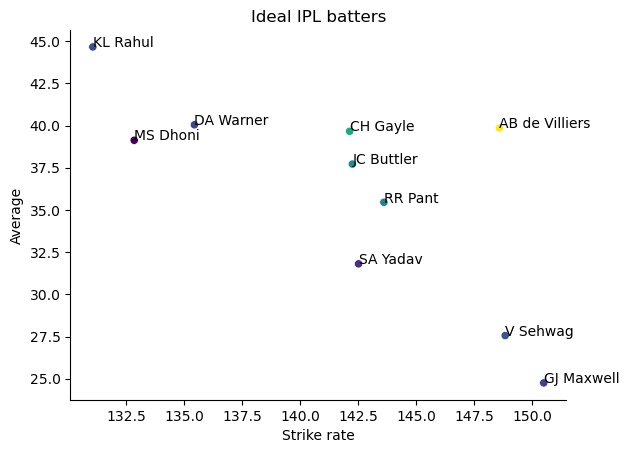

In [22]:
sns.scatterplot(data=runs,x='strike_rate',y='average',hue='rating',palette='viridis')
sns.despine()
plt.legend().remove()
plt.xlabel('Strike rate')
plt.ylabel('Average')   
plt.title('Ideal IPL batters')
for i in range(len(runs)):
    plt.text(runs['strike_rate'].iloc[i],runs['average'].iloc[i],runs['batter'].iloc[i])

plt.show()

The top right ones- high average, high strike rate batters are the best batters in IPL, with AB de Villiars being the GOAT!!

In [23]:
abd_runs=df[df['batter']=='AB de Villiers'].groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).head(6)

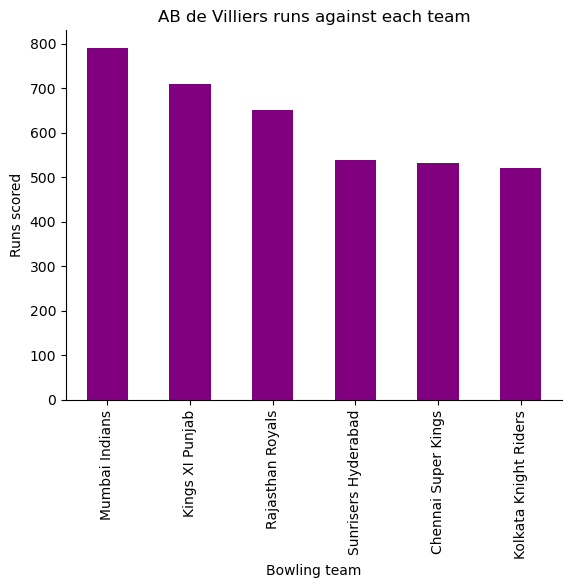

In [24]:
abd_runs.plot(kind='bar',color='purple')
plt.xlabel('Bowling team')
plt.ylabel('Runs scored')   
plt.title('AB de Villiers runs against each team')
#plt.xticks(rotation=45)
sns.despine()
plt.show()


Batter with most 4s and 6s

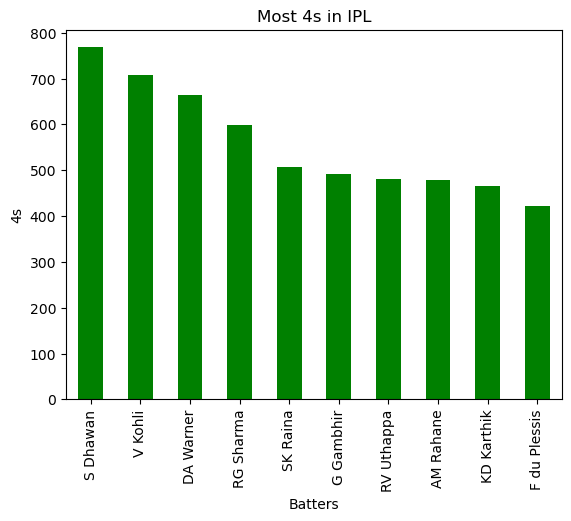

In [25]:
most4s =df[df['batsman_runs']==4].groupby('batter')['batsman_runs'].count().sort_values(ascending=False).head(10)
most4s.plot(kind='bar',color='green')
plt.xlabel('Batters')
plt.ylabel('4s')
plt.title('Most 4s in IPL')
plt.show()

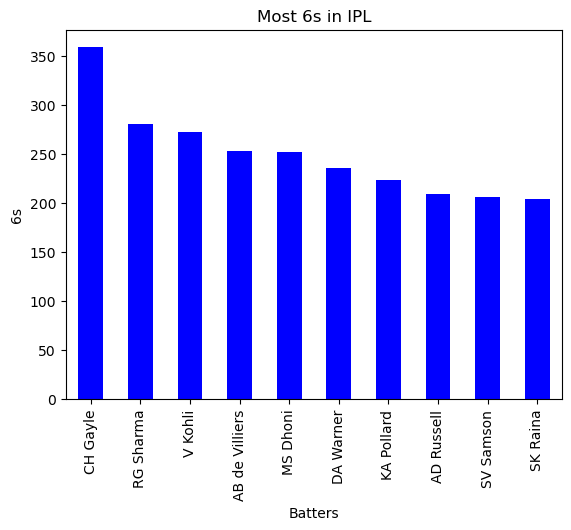

In [26]:
most6s=df[df['batsman_runs']==6].groupby('batter')['batsman_runs'].count().sort_values(ascending=False).head(10)
most6s.plot(kind='bar',color='blue')
plt.xlabel('Batters')
plt.ylabel('6s')    
plt.title('Most 6s in IPL')
plt.show()

Virat Kohli's top 5 opponents by runs scored

In [43]:
vk_runs=df[df['batter']=='V Kohli'].groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).head(5)
vk_runs

bowling_team
Chennai Super Kings      1053
Kolkata Knight Riders     962
Mumbai Indians            860
Sunrisers Hyderabad       767
Rajasthan Royals          764
Name: batsman_runs, dtype: int64

We need match-wise score against these 5 teams to plot a boxplot

For clarity, i would data like:
- match id, bowling team, batsman_runs(sum)

My boxplot visualization: x= runs, y= teams, 5 boxplots 

In [53]:
#runs against all teams match wise by V.Kohli
vk_matchwise = df[df['batter']=='V Kohli'].groupby(['match_id','bowling_team']).agg({'batsman_runs':'sum'})
vk_matchwise=vk_matchwise.reset_index()
vk_matchwise

,match_id,bowling_team,batsman_runs
0,335982,Kolkata Knight Riders,1
1,335985,Mumbai Indians,23
2,335992,Rajasthan Royals,13
3,335996,Chennai Super Kings,12
4,335998,Delhi Daredevils,1
...,...,...,...
239,1426290,Gujarat Titans,42
240,1426296,Punjab Kings,92
241,1426300,Delhi Capitals,27
242,1426306,Chennai Super Kings,47


In [62]:
vk_top5_matchwise = vk_matchwise[vk_matchwise['bowling_team'].isin(vk_runs.index)]
vk_top5_matchwise

,match_id,bowling_team,batsman_runs
0,335982,Kolkata Knight Riders,1
1,335985,Mumbai Indians,23
2,335992,Rajasthan Royals,13
3,335996,Chennai Super Kings,12
7,336012,Mumbai Indians,0
...,...,...,...
235,1426268,Sunrisers Hyderabad,42
236,1426274,Kolkata Knight Riders,18
237,1426279,Sunrisers Hyderabad,51
242,1426306,Chennai Super Kings,47


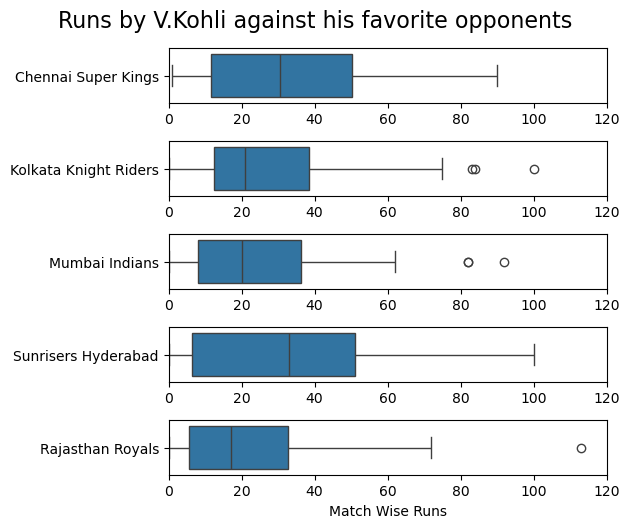

In [74]:
#boxplot against all 5 teams against which he scored most runs

fig,ax = plt.subplots(5,1)

for i in range(5):
    team_data=vk_top5_matchwise[vk_top5_matchwise['bowling_team']==vk_runs.index[i]]
    sns.boxplot(data=team_data,x='batsman_runs',y='bowling_team',ax=ax[i])
    ax[i].set(xlabel=None,ylabel=None)

for a in ax:
    a.set_xlim(0, 120)

plt.tight_layout()
plt.xlabel('Match Wise Runs')
plt.suptitle('Runs by V.Kohli against his favorite opponents',y=1.05,fontsize=16)
plt.show()